In [78]:
import numpy as np
import csv
import time
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
filename="2d_5.lvm" #2d_2 actually taped outlets
cyc=3
initfr=600
treshl=0.6
treshu=0.9
interp=1

In [79]:
##init variable
x1=[]
x2=[]
x3=[]
x4=[]
idx=[]
i=0
# open file
with open(filename) as newfile:
    rows = csv.reader(newfile,delimiter=',')
    #rows.drop(rows.tail(1).index, inplace=True)
    for i in range(22):
        next(rows,None)
    ## skip the first 22 rows    
    for row in rows:
        try:
            i+=1
            idx.append(i)
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            x3.append(float(row[3]))
            x4.append(float(row[4]))
        except:
            print("")
idx.pop()
if interp=1:
    ix4=savgol_filter(x4, 51, 3)
else:
    ix4=x4    
# smooth the pressure

In [3]:
#section the data into cyclses by finding the lower points
initp=np.mean(x4[1:20]) ## find fluidization approximate
dropp=initp*treshl # pressure to drop to
upp=initp*treshu # pressure to maximum rise to
pt=0
lowpt=[]
highpt=[]
for c in range(cyc):
    while ix4[pt]>dropp:
        pt+=1
    lowpt.append(pt)
    #print("t")
    pt-=1
    if c+1<cyc:
        while ix4[pt]<upp:
            pt+=1
#print(lowpt)    

In [92]:
gx=[]
umfp=[]#

for lp in lowpt:
    #print(np.mean(np.gradient(x4[lp-50:lp],1)))
    gx.append(np.mean(np.gradient(ix4[lp-50:lp],1))) # 150 before # for 5 mm 50 pts # for 2 mm 100 pts
    umfp2=int(np.round(lp+(initp-ix4[lp])/gx[-1]))
    umfp.append(x1[umfp2])                  

In [93]:
print(umfp)
print(np.mean(umfp))
mumfp=np.mean(umfp)
mumfpm=mumfp*1e-3/60

[222.000015, 222.000015, 220.000031]
221.33335366666665


In [6]:
r=0.095
A=3.14*r**2
A=0.19*0.05
print(mumfpm/A)

0.3900585058479532


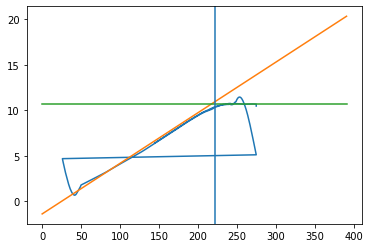

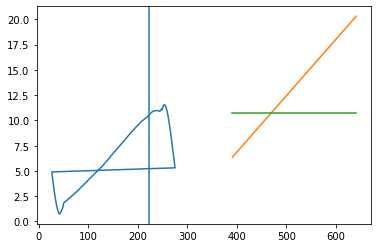

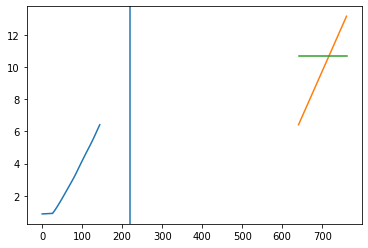

In [122]:
## check the values graphically
for i in range(0,cyc):
    
    if i==0:
        startp=0
        endp=lowpt[i+1]
    elif i==cyc-1:
        endp=len(x1)
        startp=lowpt[i]
    else:
        endp=lowpt[i+1]
        startp=lowpt[i]
    plt.plot(x1[startp:endp],ix4[startp:endp])
    dx=np.abs(x1[222]-x1[221])
    x = np.linspace(startp,endp,endp-startp+1)
    y=  -gx[i]*x*dx+ix4[lowpt[i]]+gx[i]*lowpt[i]*dx ## ????
    y2= np.ones(len(x))*initp
    plt.plot(x*dx,y)
    plt.plot(x*dx,y2)
    plt.axvline(x=umfp[i])
    plt.show()

In [7]:
while False:
    plt.plot(x1[lowpt[0]:-1],ix4[lowpt[0]:-1]) # print the curves

# calc gradients
    gx1=np.gradient(x1,1)
    gx4=np.gradient(ix4,1)/gx1# calculate the numerical derivative of the pressure dp/dV'

# init variables
    seq=np.zeros((cyc,2),dtype=int)
    endslope=np.zeros((cyc))
    idz=[0]

# find points where volume flow increases a lot (start points)
    for i in range(0,len(x1)):
        if gx1[i]>60 and idz[-1] != i-1:
            idz.append(i)
    
#if cyc==0
#    cyc=len(idz)

## define the ranges        
    for c in range(0,cyc-1):
        seq[c,:]=[int(idz[c]+2), int(idz[c+1]-1)]
    seq[cyc-1,:]=[int(idz[cyc-1]+2), int(len(x1)-4)]  

## take only the positive points of the gradient
    gx4p=gx4>0
#print(gx4)
    for c in range(0,cyc):
        for i in range(seq[c,0]+50,seq[c,1]):
            print(i)
            if gx4p[i]>0:
                endslope[c]=i
                break
 
#find mean pressure values of umf vib
    mpv=np.zeros(cyc)
    for c in range(0,cyc-1):
        mpv[c]=np.mean(x4[int(endslope[c]):int(seq[c,1]-2)])
     
 

    plt.show()
    print(endslope)